### CIFAR10 Result Exploration
Purpose of this notebook:
- Find out if there are configurations for which one framework is resilient and another isn't
- Find out if there are configuration for which both frameworks have high accuracy, but low resiliency

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
results = pd.read_csv("../../singularity_singlegpu_cifar10_10trials_11-13.csv")

In [18]:
len(results)

50

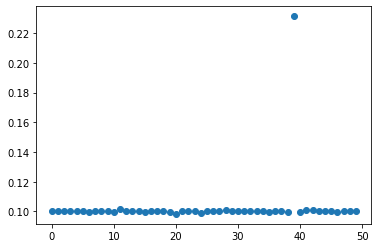

In [22]:
plt.scatter(list(range(0, len(results))), results['average_res'])

In [4]:
results.head()

,trial_id,pt_test_acc,pt_uniform_accuracy,pt_gaussian_accuracy,pt_saltandpepper_accuracy,pt_spatial_accuracy,tf_test_acc,tf_uniform_accuracy,tf_gaussian_accuracy,tf_saltandpepper_accuracy,...,hostname,node_ip,time_since_restore,timesteps_since_restore,iterations_since_restore,experiment_tag,config.learning_rate,config.dropout,config.epochs,config.batch_size
0,0712db16,0.100370,0.100370,0.100370,0.100370,0.100370,0.1,0.099506,0.099506,0.099506,...,thetagpu19,140.221.68.29,920.160028,0,2,"1_batch_size=225,dropout=0.25658,epochs=89,lea...",0.064840,0.256585,89,225
1,0718dd54,0.100103,0.100103,0.100103,0.100103,0.100103,0.1,0.100103,0.100103,0.100103,...,thetagpu19,140.221.68.29,1401.507566,0,2,"2_batch_size=103,dropout=0.51158,epochs=80,lea...",0.073790,0.511584,80,103
2,071b251e,0.100415,0.100415,0.100415,0.100415,0.100415,0.1,0.100415,0.100415,0.100415,...,thetagpu19,140.221.68.29,866.857365,0,2,"3_batch_size=241,dropout=0.21176,epochs=81,lea...",0.096372,0.211758,81,241
3,071d7120,0.099940,0.099940,0.099940,0.099940,0.099940,0.1,0.100140,0.100140,0.100140,...,thetagpu19,140.221.68.29,3784.561622,0,2,"4_batch_size=32,dropout=0.49976,epochs=84,lear...",0.086507,0.499765,84,32
4,071f9914,0.100940,0.100940,0.100940,0.100932,0.100841,0.1,0.099373,0.099373,0.099373,...,thetagpu19,140.221.68.29,953.440547,0,2,"5_batch_size=161,dropout=0.41331,epochs=48,lea...",0.060826,0.413308,48,161


In [5]:
results['average_pt_resiliency'] = (results['pt_uniform_accuracy']+results['pt_gaussian_accuracy']+results['pt_saltandpepper_accuracy'])/3

In [6]:
results['average_tf_resiliency'] = (results['tf_uniform_accuracy']+results['tf_gaussian_accuracy']+results['tf_saltandpepper_accuracy'])/3

In [7]:
results['resiliency_difference'] = results['average_pt_resiliency'] - results['average_tf_resiliency']

In [8]:
results.head()

,trial_id,pt_test_acc,pt_uniform_accuracy,pt_gaussian_accuracy,pt_saltandpepper_accuracy,pt_spatial_accuracy,tf_test_acc,tf_uniform_accuracy,tf_gaussian_accuracy,tf_saltandpepper_accuracy,...,timesteps_since_restore,iterations_since_restore,experiment_tag,config.learning_rate,config.dropout,config.epochs,config.batch_size,average_pt_resiliency,average_tf_resiliency,resiliency_difference
0,0712db16,0.100370,0.100370,0.100370,0.100370,0.100370,0.1,0.099506,0.099506,0.099506,...,0,2,"1_batch_size=225,dropout=0.25658,epochs=89,lea...",0.064840,0.256585,89,225,0.100370,0.099506,8.641975e-04
1,0718dd54,0.100103,0.100103,0.100103,0.100103,0.100103,0.1,0.100103,0.100103,0.100103,...,0,2,"2_batch_size=103,dropout=0.51158,epochs=80,lea...",0.073790,0.511584,80,103,0.100103,0.100103,-4.163336e-17
2,071b251e,0.100415,0.100415,0.100415,0.100415,0.100415,0.1,0.100415,0.100415,0.100415,...,0,2,"3_batch_size=241,dropout=0.21176,epochs=81,lea...",0.096372,0.211758,81,241,0.100415,0.100415,0.000000e+00
3,071d7120,0.099940,0.099940,0.099940,0.099940,0.099940,0.1,0.100140,0.100140,0.100140,...,0,2,"4_batch_size=32,dropout=0.49976,epochs=84,lear...",0.086507,0.499765,84,32,0.099940,0.100140,-1.996805e-04
4,071f9914,0.100940,0.100940,0.100940,0.100932,0.100841,0.1,0.099373,0.099373,0.099373,...,0,2,"5_batch_size=161,dropout=0.41331,epochs=48,lea...",0.060826,0.413308,48,161,0.100937,0.099373,1.563960e-03


In [15]:
biggest_resiliency_difference = results.sort_values('resiliency_difference')

In [16]:
biggest_resiliency_difference.head()

,trial_id,pt_test_acc,pt_uniform_accuracy,pt_gaussian_accuracy,pt_saltandpepper_accuracy,pt_spatial_accuracy,tf_test_acc,tf_uniform_accuracy,tf_gaussian_accuracy,tf_saltandpepper_accuracy,...,timesteps_since_restore,iterations_since_restore,experiment_tag,config.learning_rate,config.dropout,config.epochs,config.batch_size,average_pt_resiliency,average_tf_resiliency,resiliency_difference
28,6750a3b6,0.100102,0.100102,0.100102,0.100102,0.100102,0.1,0.101809,0.101809,0.101809,...,0,2,"9_batch_size=301,dropout=0.89955,epochs=37,lea...",0.043918,0.899551,37,301,0.100102,0.101809,-0.001706
46,98db9078,0.099712,0.099712,0.099712,0.099712,0.099417,0.1,0.100192,0.100192,0.100192,...,0,2,"7_batch_size=212,dropout=0.50318,epochs=12,lea...",0.053120,0.503183,12,212,0.099712,0.100192,-0.000480
22,67389ee2,0.100000,0.100000,0.100000,0.100000,0.099602,0.1,0.100438,0.100438,0.100438,...,0,2,"3_batch_size=54,dropout=0.62071,epochs=61,lear...",0.037948,0.620708,61,54,0.100000,0.100438,-0.000438
3,071d7120,0.099940,0.099940,0.099940,0.099940,0.099940,0.1,0.100140,0.100140,0.100140,...,0,2,"4_batch_size=32,dropout=0.49976,epochs=84,lear...",0.086507,0.499765,84,32,0.099940,0.100140,-0.000200
44,98d23ffa,0.100283,0.100283,0.100283,0.100283,0.100283,0.1,0.100378,0.100378,0.100378,...,0,2,"5_batch_size=215,dropout=0.44649,epochs=46,lea...",0.068956,0.446494,46,215,0.100283,0.100378,-0.000094


In [11]:
biggest_resiliency_difference.tail()

,trial_id,pt_test_acc,pt_uniform_accuracy,pt_gaussian_accuracy,pt_saltandpepper_accuracy,pt_spatial_accuracy,tf_test_acc,tf_uniform_accuracy,tf_gaussian_accuracy,tf_saltandpepper_accuracy,...,timesteps_since_restore,iterations_since_restore,experiment_tag,config.learning_rate,config.dropout,config.epochs,config.batch_size,average_pt_resiliency,average_tf_resiliency,resiliency_difference
42,98c6c5da,0.102051,0.102051,0.102051,0.102051,0.100098,0.1,0.100586,0.100586,0.100586,...,0,2,"3_batch_size=256,dropout=0.28184,epochs=50,lea...",0.090492,0.281835,50,256,0.102051,0.100586,0.001465
4,071f9914,0.100940,0.100940,0.100940,0.100932,0.100841,0.1,0.099373,0.099373,0.099373,...,0,2,"5_batch_size=161,dropout=0.41331,epochs=48,lea...",0.060826,0.413308,48,161,0.100937,0.099373,0.001564
25,6744773a,0.100969,0.100969,0.100969,0.100969,0.100969,0.1,0.098892,0.098892,0.098892,...,0,2,"6_batch_size=128,dropout=0.76733,epochs=29,lea...",0.054406,0.767331,29,128,0.100969,0.098892,0.002077
41,98c2c2aa,0.104227,0.104227,0.104227,0.104227,0.103936,0.1,0.097182,0.097182,0.097182,...,0,2,"2_batch_size=294,dropout=0.29397,epochs=20,lea...",0.053068,0.293972,20,294,0.104227,0.097182,0.007046
39,8b148504,0.453182,0.453436,0.453321,0.446550,0.000391,0.1,0.101826,0.101826,0.101826,...,0,2,"10_batch_size=284,dropout=0.61125,epochs=32,le...",0.002231,0.611248,32,284,0.451102,0.101826,0.349277


### Is model accuracy entirely based off of epochs?

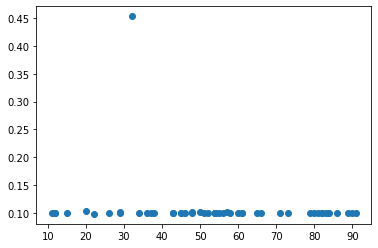

In [12]:
plt.scatter(results['config.epochs'], results['pt_test_acc'])

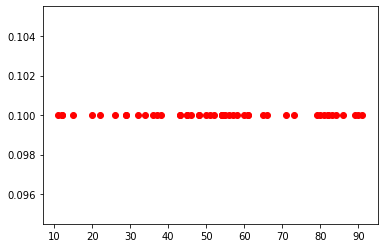

In [13]:
plt.scatter(results['config.epochs'], results['tf_test_acc'], color="red")

### Is Model Resiliency based off epochs?

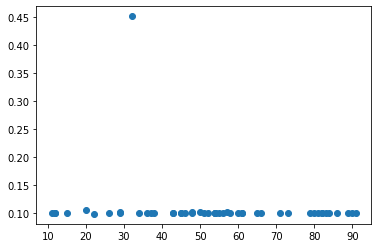

In [14]:
plt.scatter(results['config.epochs'], results['average_pt_resiliency'])

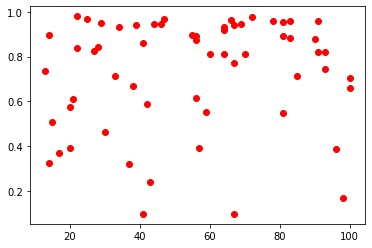

In [55]:
plt.scatter(results['config.epochs'], results['average_tf_resiliency'], color="red")

### Top configurations where test accuracy is high, but resiliency is low

In [56]:
results['average_test_accuracy'] = (results['pt_test_acc']+results['tf_test_acc'])/2

In [57]:
results['average_resiliency'] = (results['average_pt_resiliency']+results['average_tf_resiliency'])/2

In [58]:
results['test_resiliency_diff'] = results['average_test_accuracy'] - results['average_resiliency']

Text(0, 0.5, 'Average Resiliency')

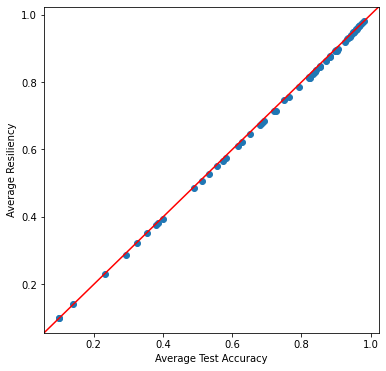

In [59]:
f, ax = plt.subplots(figsize=(6, 6))
ax.scatter(results['average_test_accuracy'], results['average_resiliency'])
ax.plot([0, 1], [0, 1], transform=ax.transAxes, color="red")
ax.set_xlabel("Average Test Accuracy")
ax.set_ylabel("Average Resiliency")

In [60]:
high_test_low_res = results.sort_values('test_resiliency_diff', ascending=False)

In [61]:
high_test_low_res.head()

,trial_id,pt_test_acc,pt_uniform_accuracy,pt_gaussian_accuracy,pt_saltandpepper_accuracy,pt_spatial_accuracy,tf_test_acc,tf_uniform_accuracy,tf_gaussian_accuracy,tf_saltandpepper_accuracy,...,config.learning_rate,config.dropout,config.epochs,config.batch_size,average_pt_resiliency,average_tf_resiliency,resiliency_difference,average_test_accuracy,average_resiliency,test_resiliency_diff
47,eb1f8d26,0.798550,0.783283,0.784994,0.790448,0.018924,0.8509,0.833533,0.835436,0.842113,...,0.091615,0.319694,22,236,0.786242,0.837027,-0.050785,0.824725,0.811634,0.013090
34,30a90c3c,0.812582,0.798440,0.800030,0.804044,0.019347,0.8322,0.820834,0.822144,0.826048,...,0.071979,0.488355,27,207,0.800838,0.823009,-0.022171,0.822391,0.811924,0.010467
10,3642dbd8,0.848116,0.836670,0.837807,0.840500,0.016434,0.8217,0.808852,0.809996,0.814758,...,0.049666,0.676417,64,259,0.838325,0.811202,0.027124,0.834908,0.824764,0.010145
40,eb109bea,0.702360,0.691717,0.692617,0.696184,0.010199,0.7485,0.735266,0.736309,0.740655,...,0.095919,0.216144,13,132,0.693506,0.737410,-0.043904,0.725430,0.715458,0.009972
45,eb1c50a2,0.910688,0.900096,0.901327,0.900280,0.002203,0.9038,0.895045,0.895968,0.891483,...,0.051195,0.225093,55,122,0.900568,0.894165,0.006402,0.907244,0.897366,0.009878
